In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs, load_wine
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [31]:
X, _ = make_blobs(n_samples=50, centers=2, cluster_std=1.7)

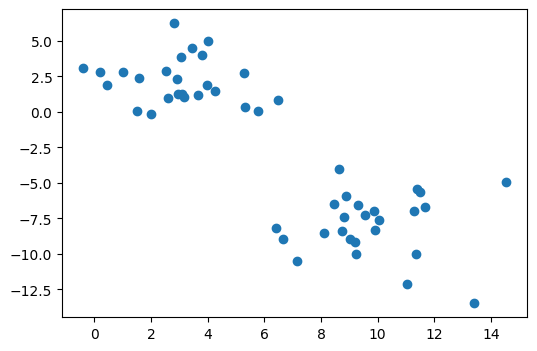

In [32]:
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [34]:
linkage_matrix = linkage(X, method="ward")

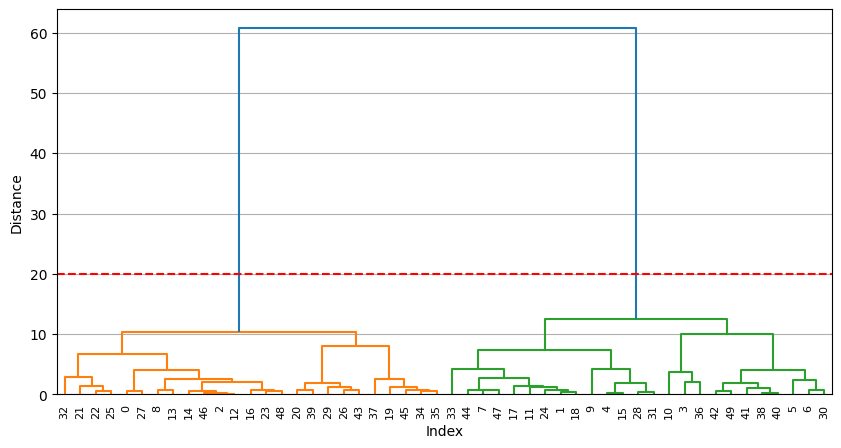

In [42]:
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.grid(axis="y")
plt.axhline(20, ls="--", color="red")
plt.show()

In [43]:
model = AgglomerativeClustering(n_clusters=2)

In [44]:
pred = model.fit_predict(X)

In [45]:
pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0], dtype=int64)

In [46]:
_

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0])

In [47]:
np.allclose(pred, _)

True

In [49]:
silhouette_score(X, pred)

0.731460165118926

In [51]:
wine = load_wine()

In [52]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [53]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target

In [54]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


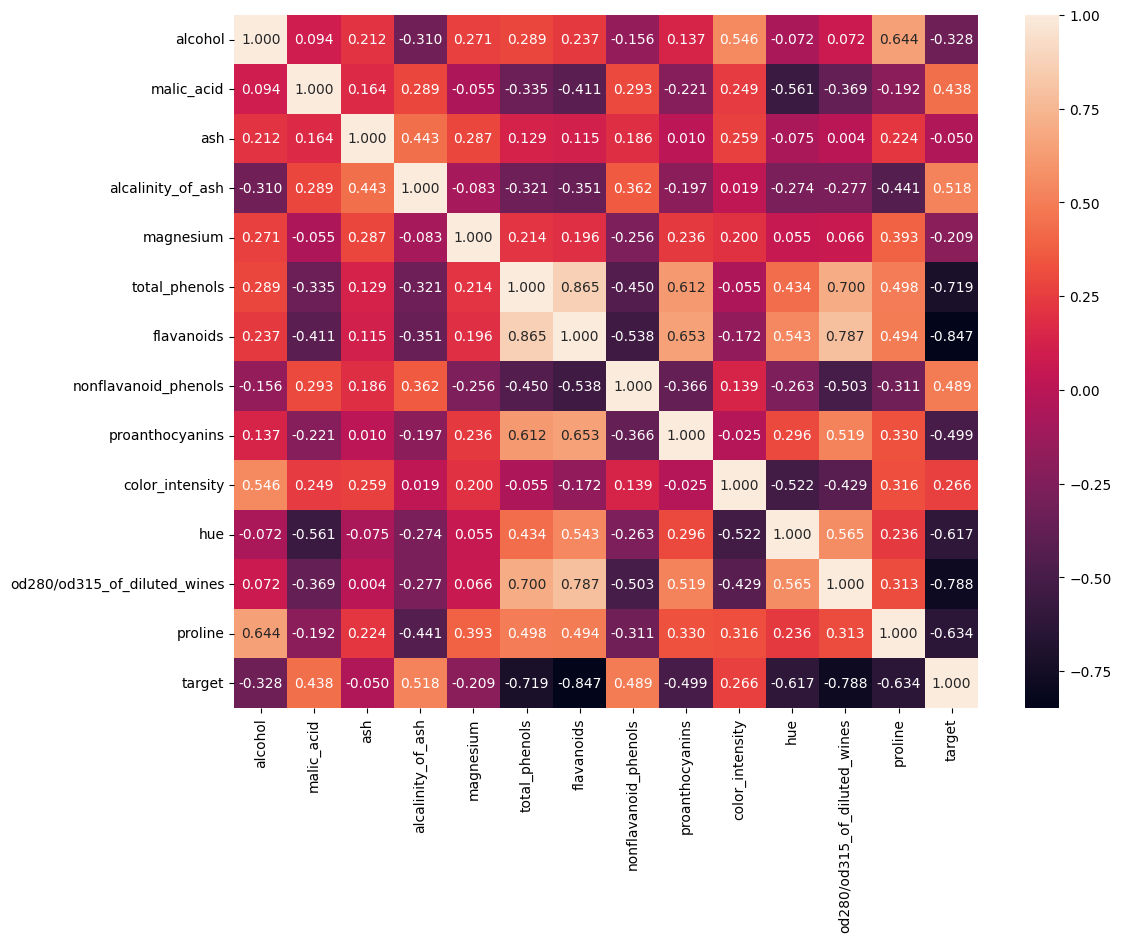

In [56]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.show()

In [57]:
wine_linkage = linkage(df.drop("target", axis=1), method="ward")

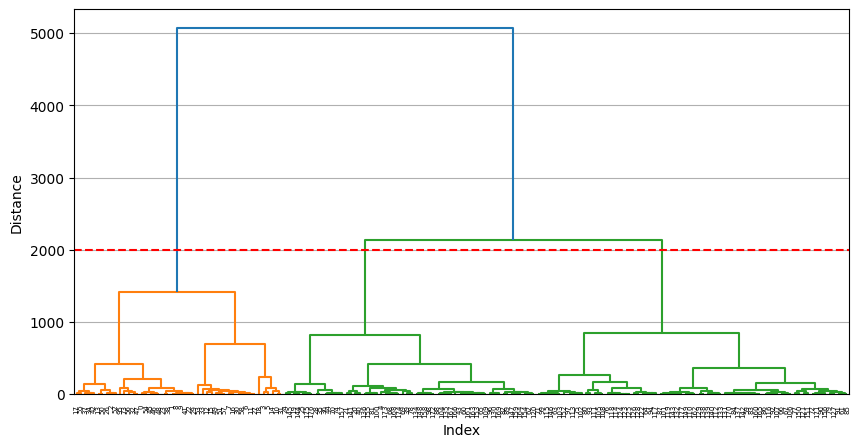

In [59]:
plt.figure(figsize=(10, 5))
dendrogram(wine_linkage)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.grid(axis="y")
plt.axhline(2000, ls="--", color="red")
plt.show()

In [60]:
wine_groups = AgglomerativeClustering(n_clusters=3)

In [61]:
clusters = wine_groups.fit_predict(df.drop("target", axis=1))

In [62]:
silhouette_score(df.drop("target", axis=1), clusters)

0.5644796401732068